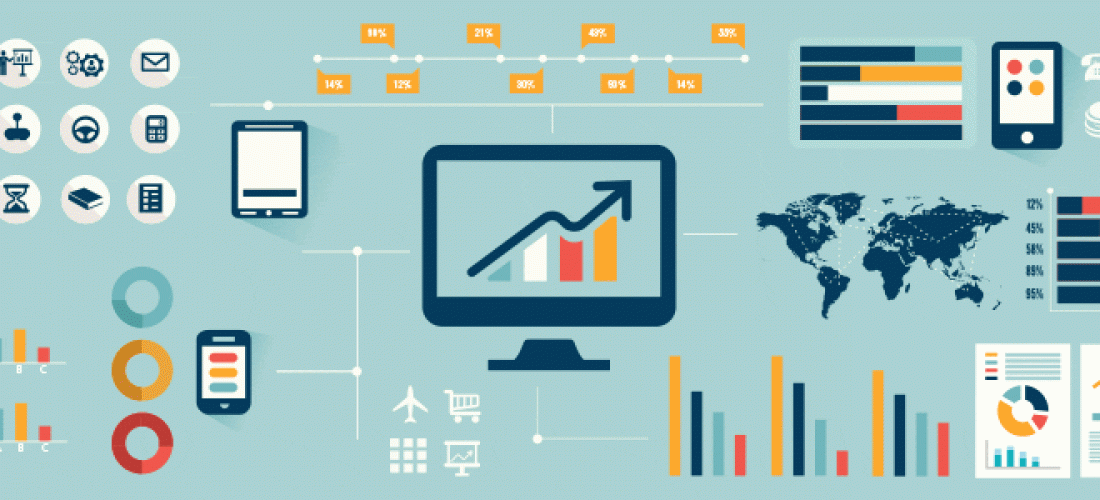

# Problem Overview

This dataset was created by picklesueat and contains more than 2000 job listing for data analyst positions, with features such as:

* Salary Estimate
* Location
* Company Rating
* Job Description and more.

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Load data

In [ ]:
data = pd.read_csv('../input/data-analyst-jobs/DataAnalyst.csv')

In [ ]:
data.head()

In [ ]:
data.info()

# Data Cleaning

This data contains -1 in multiple columns that indicates missing data. Replace it with np.nan

In [ ]:
data = data.replace(-1, np.nan)
data = data.replace('-1', np.nan)
data = data.replace(-1.0, np.nan)

In [ ]:
data.info()

In [ ]:
data['Salary Estimate'].value_counts()

Salary estimate is a string with alpha-numeric and special symbols. Extract min and max salary values and put them in different columns

In [ ]:
data['Salary Estimate'] = data['Salary Estimate'].apply(lambda x: str(x))
data['Salary Estimate'] = data['Salary Estimate'].apply(lambda x: re.findall(r'\d+', x))
data['sal_est_min'] = data['Salary Estimate'].str[0].astype(np.float32)
data['sal_est_max'] = data['Salary Estimate'].str[1].astype(np.float32)
data.drop('Salary Estimate', axis=1, inplace=True)

In [ ]:
data['Revenue'].value_counts()

Revenue is given in million dollars in some cases and billion dollars in other cases. Extract min and max revenues and put them in different columns

In [ ]:
data['rev_scale'] = data['Revenue'].apply(lambda x: 1e6 if 'million' in str(x) else (1e9 if 'billion' in str(x) else (np.nan)))
data['rev_scale'] = data['rev_scale'].astype(np.float32)
data['Revenue'] = data['Revenue'].apply(lambda x: str(x))
data['Revenue'] = data['Revenue'].apply(lambda x: re.findall(r'\d+', x))
data['rev_min'] = data['Revenue'].str[0].astype(np.float32) * data['rev_scale']
data['rev_max'] = data['Revenue'].str[1].astype(np.float32) * data['rev_scale']
data.drop(['Revenue', 'rev_scale'], axis=1, inplace=True)

In [ ]:
data['Size'].value_counts()

Extract employee size 

In [ ]:
data['Size'] = data['Size'].apply(lambda x: str(x))
data['Size'] = data['Size'].apply(lambda x: re.findall(r'\d+', x))
data['min_emp_size'] = data['Size'].str[0].astype(np.float32)
data['max_emp_size'] = data['Size'].str[1].astype(np.float32)
data.drop('Size', axis=1, inplace=True)

In [ ]:
data['Location'].value_counts()

Split Location into city and state

In [ ]:
data['city'], data['state'] = data['Location'].str.split(',', 1).str
data.drop('Location', axis=1, inplace=True)

In [ ]:
data['Headquarters'].value_counts()

Split Headquarters into HQ city and HQ state

In [ ]:
data['hq_city'], data['hq_state'] = data['Headquarters'].str.split(',',1).str
data.drop('Headquarters', axis=1, inplace=True)

In [ ]:
data['company'] = data['Company Name'].apply(lambda x: str(x).split('\n')[0])
data.drop('Company Name', axis=1, inplace=True)

In [ ]:
data['Job Title'].head()

Extract Job title and department from Job title field

In [ ]:
data['Job Title'], data['Department'] = data['Job Title'].str.split(',', 1).str
data[['Job Title', 'Department']].head()

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.head()

# Data Visualization

**Job Titles**

In [ ]:
job_titles = list(data['Job Title'].values)
jt = ' '.join(job_titles)
wc = WordCloud(width = 800, height = 640, background_color='black').generate(jt)
plt.figure(figsize = (14, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
titles , values = zip(*Counter(job_titles).most_common(20))
plt.figure(figsize=(12,7))
plt.bar(titles, values)
plt.title('Top Job Titles')
plt.xticks(rotation=90)
plt.show()

**Founding Year. Considering it from 1930 until 2020**

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data['Founded'], bins=100, kde=False, color='orange', hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0})
plt.xlim([1930, 2020])
plt.title('Founding Year')
plt.xlabel('Year Founded')
plt.ylabel('No .of companies')
plt.show()

Many of these organizations were founded around 2000 

**Type of Ownership**

In [ ]:
ownership= list(data['Type of ownership'].dropna().values)
dict1 = Counter(ownership)
dict1 = sorted(dict1.items(), key=lambda x: x[1], reverse=True)
ownership_type, counts = zip(*dict1)
plt.figure(figsize=(12,7))
plt.bar(ownership_type, counts, color='crimson')
plt.title('Ownership Type')
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('No. of companies')
plt.show()

A great majority of these organizations happen to be Private and Public companies

**Industry**

In [ ]:
industry = data['Industry'].dropna().values
ind, vals = zip(*Counter(industry).most_common(15))
plt.figure(figsize=(12,8))
plt.bar(ind, vals, color='brown')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('No. of companies')
plt.show()

IT Services, Staffing & Outsourcing are the top two industries where there are far more Data Analyst roles than in other industries. 

**Sectors**

In [ ]:
sector = data['Sector'].dropna()
fig = px.pie(sector, names='Sector', title='Sectors')
fig.show()

Three quarters of total job postings are from 4 sectors: Tech, Business services, Finance, Health care.

In [ ]:
# Total no. of cities in data
len(data['city'].unique())

**Min and Max salaries of top 25 cities**

In [ ]:
top_25 = data.groupby('city')[['sal_est_min', 'sal_est_max']].mean().sort_values(by = ['sal_est_max','sal_est_min'], ascending = False).head(25)

fig = go.Figure()

fig.add_trace(go.Bar(x=top_25.index, y=top_25.sal_est_min, name='Min Salary'))
fig.add_trace(go.Bar(x=top_25.index, y=top_25.sal_est_max, name='Max Salary'))

fig.update_layout(title='Min and Max salaries in top 25 cities for Data Analyst roles in $\'000', barmode='stack')
fig.show()

In [ ]:
roles_sal = data.groupby('Job Title')[['sal_est_min', 'sal_est_max']].mean().sort_values(['sal_est_max', 'sal_est_min'], ascending=False).head(20)

fig = go.Figure()

fig.add_trace(go.Bar(x=roles_sal.index, y=roles_sal.sal_est_min, name='Min Salary'))
fig.add_trace(go.Bar(x=roles_sal.index, y=roles_sal.sal_est_max, name='Max Salary'))

fig.update_layout(title='Min & Max salaries of 20 Job titles in $\'000', barmode='stack')
fig.show()

Percentage of job openings in data

In [ ]:
data['Easy Apply'][data['Easy Apply'].notna()].shape[0]/data.shape[0] * 100

Only 3.55% of the data contains job openings

Job vacancies

In [ ]:
openings = data['Job Title'][data['Easy Apply'] == 'True']
openings = Counter(openings).most_common(15)
openings, counts = zip(*openings)
plt.figure(figsize=(12,6))
plt.bar(openings, counts)
plt.title('Job vacancies')
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('No. of vacancies')
plt.show()

If you like my work, please upvote :)